In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#load the dataset
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
X = data.drop("MEDV",axis=1)
y = data['MEDV']

In [18]:
print(X.shape, y.shape)

(506, 13) (506,)


In [19]:
data.rename(columns={'MEDV':'PRICE'},inplace=True)
y = data['PRICE']

In [22]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [24]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [25]:
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [27]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [28]:
corr = data.corr()
corr.shape

(14, 14)

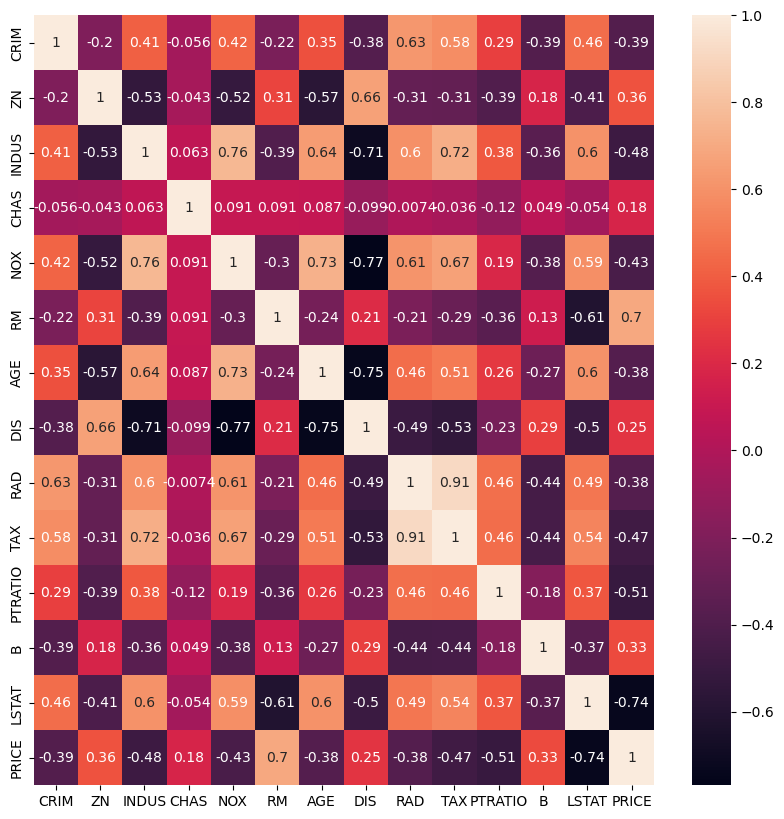

In [37]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
#linear regeression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
print(lr.intercept_)

22.796534653465343


In [53]:
coeff = pd.DataFrame({
    "Attribute": X.columns,
    "Coefficient": lr.coef_
})

coeff

,Attribute,Coefficient
0,CRIM,-1.002135
1,ZN,0.696269
2,INDUS,0.278065
3,CHAS,0.718738
4,NOX,-2.022319
5,RM,3.145240
6,AGE,-0.176048
7,DIS,-3.081908
8,RAD,2.251407
9,TAX,-1.767014


In [54]:
#prediction with test data
y_pred = lr.predict(X_test)

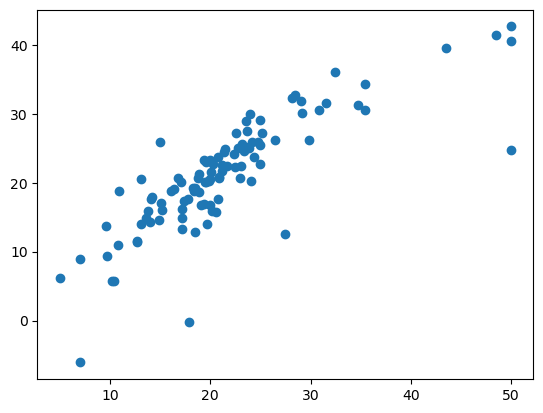

In [65]:
plt.scatter(y_test,y_pred)
plt.show()

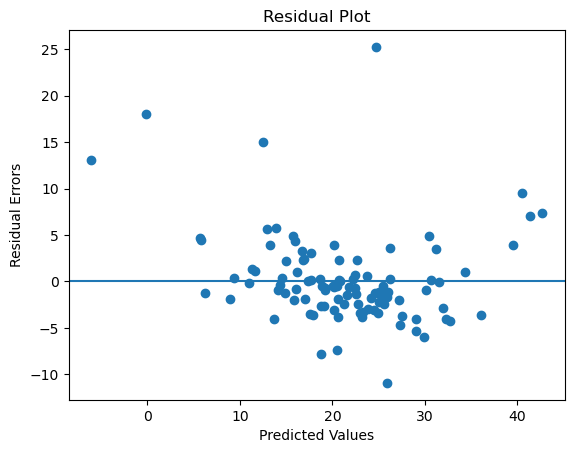

In [68]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0)

plt.xlabel("Predicted Values")
plt.ylabel("Residual Errors")
plt.title("Residual Plot")
plt.show()

C:\Users\rajan\AppData\Local\Temp\ipykernel_8176\961808148.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


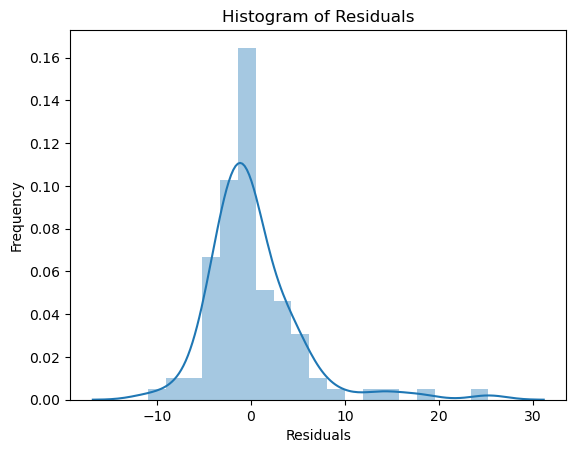

In [70]:
sns.distplot(y_test-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [72]:
# Model Evaluation
from sklearn import metrics

print('R2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2: 0.6687594935356321
Adjusted R^2: 0.6198262368988505
MAE: 3.1890919658878483
MSE: 24.29111947497351
RMSE: 4.928602182665336


In [88]:
#new date prediction
new_data1 = [[0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98]]
pred = lr.predict(scaler.transform(new_data1))
print("Predicted House Price:", pred)

Predicted House Price: [29.95339638]


C:\Users\rajan\anaconda3\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [79]:
print("Predicted House Price:", pred[0]*1000, "Dollars")

Predicted House Price: 29953.39637733569 Dollars


In [82]:
rm = float(input("Enter number of rooms: "))
lstat = float(input("Enter LSTAT value: "))

new_data = [[0.2, 18, 2.31, 0, 0.538, rm, 65, 4.1, 1, 296, 15.3, 396, lstat]]

print("Predicted Price:", lr.predict(scaler.transform(new_data)))

Enter number of rooms:  3
Enter LSTAT value:  5


Predicted Price: [14.02815686]


C:\Users\rajan\anaconda3\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [83]:
import pickle

In [84]:
pickle.dump(lr,open('lr.pkl','wb'))

In [85]:
pickle_model = pickle.load(open('lr.pkl','rb'))

In [89]:
pickle_model.predict(scaler.transform(new_data1))

C:\Users\rajan\anaconda3\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.95339638])